# Example of Uniform Sampling Method

In [18]:
from src.ECMC.uniformsampling import uniformsampling
import numpy as np
import matplotlib.pyplot as plt
import time

In [19]:
def HKY(kappa, frq):
    Sym = np.array([[0, kappa, 1, 1],
                   [kappa, 0, 1, 1],
                   [1, 1, 0, kappa],
                   [1, 1, kappa, 0]])
    Frq = np.array([frq, frq, frq, frq])
    Q = np.dot(Sym, Frq)
    for i in range(4):
        Q[i, i] = -(np.sum(Q, axis = 1).tolist()[i] - Q[i, i])
    Q = Q/sum(-np.diag(Q)*frq)
    return Q

In [20]:
frq = [0.2, 0.3, 0.3, 0.2]
Q = -HKY(2, frq)
a = 1
b = 2
dur = [None]*50
for T in range(50):
    start = time.time()
    path = uniformsampling(Q, T+1, a, b)
    end = time.time()
    dur[T] = end - start

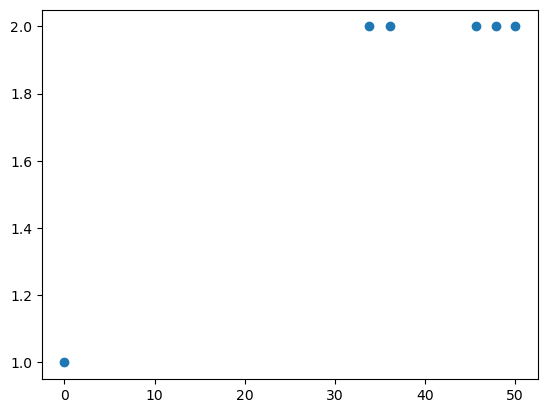

In [21]:
state = [i[0] for i in path]
time = [i[1] for i in path]
plt.scatter(time, state)

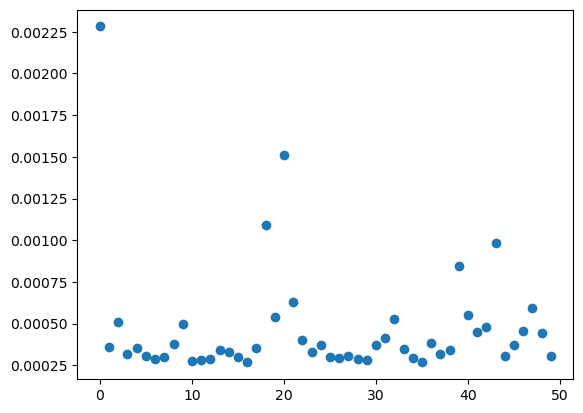

In [22]:
plt.scatter(range(50), dur)